<h1 align="center"> 
CERVICAL CANCER
</h1>

<h4 align="center"> 

</h4>

In [85]:
pip install mlxtend.plotting


The following command must be run outside of the IPython shell:

    $ pip install mlxtend.plotting

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [86]:
 -m pip install mlxtend.plotting

SyntaxError: invalid syntax (<ipython-input-86-c568e5738ec1>, line 1)

In [132]:



import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score

import warnings

warnings.filterwarnings("ignore")


## 3. Data preprocessing

In [134]:

# Load the data
df = pd.read_csv('risk_factors_cervical_cancer.csv')

# Show the header and the first five rows
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [135]:
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

#df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis','Hinselmann','Schiller','Citology'],inplace=True,axis=1)

In [136]:
df=df.rename(index=str, columns={"Biopsy": "Target"})
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Target
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [137]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Target'],
      dtype='object')

### 3.2. Remove rows with missing values

In [138]:


print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df = df.replace('?', np.NaN)

# Remove rows with np.NaN
df = df.dropna(how='any')

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 858
Number of rows after removing rows with missing values: 668


### 3.3. Get the feature and target vector

In [139]:
# Get the target vector
y = df.Target

In [140]:
# Specify the name of the features
features = list(df.drop('Target', axis=1).columns)

# Get the feature vector
X = df[features]

In [141]:
#ONE HOT ENCODING 
#X = pd.get_dummies(X)

# Show the encoded features
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


### 3.4. Encode the target

In [142]:
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y = le.fit_transform(y)

### 3.5. Divide the data into training and testing

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print([np.where(y_train == 0)[0].shape[0], np.where(y_train == 1)[0].shape[0]])

[436, 31]


### 3.6.Scale the Data

In [144]:

std_scl= StandardScaler()

X_train_std = std_scl.fit_transform(X_train)

X_test_std = std_scl.transform(X_test)

### 3.7.Dimensionality Reduction Using PCA

### The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [145]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train_std)
                   
Explained_Variance = (pca.explained_variance_ratio_)
print("The PCA Components:")


print(pca.components_)

The PCA Components:
[[ 2.88726098e-02  1.02650322e-02  5.95111748e-03 ...  6.46138222e-02
   9.98322695e-02  5.56761746e-02]
 [ 1.93117678e-01  4.51041152e-02  5.29006232e-02 ...  2.11909705e-01
   2.00683424e-01  8.55753906e-02]
 [ 2.12133323e-01  1.88121732e-01 -2.44217184e-02 ... -1.13283072e-01
  -6.92689121e-02 -7.10141601e-02]
 ...
 [-0.00000000e+00 -7.43420900e-17  1.75631055e-17 ...  6.79236389e-17
   1.29683537e-17 -1.34242286e-16]
 [ 0.00000000e+00 -9.19152010e-17  4.92269406e-17 ... -3.09019535e-17
  -1.42007737e-16  1.40803878e-16]
 [-0.00000000e+00  5.17015924e-17  7.80041946e-18 ...  3.08454925e-18
  -4.87609654e-17  3.85043166e-17]]


In [146]:
print("Explained Variance:")

print(Explained_Variance)

Explained Variance:
[1.67401354e-01 1.08673399e-01 8.60026472e-02 7.19019131e-02
 5.82392976e-02 5.52647320e-02 5.08626896e-02 4.24771046e-02
 3.89447287e-02 3.60507715e-02 3.49745392e-02 3.33789462e-02
 3.08054283e-02 2.83326882e-02 2.76959603e-02 2.61478915e-02
 2.54972320e-02 1.89297446e-02 1.67441602e-02 1.02874340e-02
 8.79194911e-03 6.89837962e-03 4.99014460e-03 4.41821988e-03
 2.82367700e-03 1.81989157e-03 1.26592847e-03 3.79147835e-04
 3.30140959e-32 8.81243673e-34 8.81243673e-34 8.81243673e-34
 8.81243673e-34]


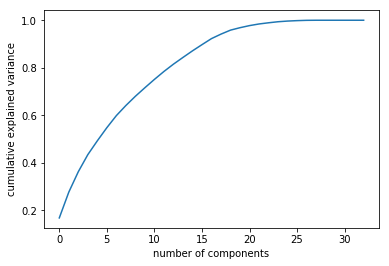

In [147]:
# Plot the principal components
X_train_pca = pca.fit_transform(X_train_std)
plt.plot(np.cumsum(Explained_Variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [148]:

# Apply PCA



pca = PCA()

X_train_pca = pca.fit_transform(X_train_std)



print("Explained Variance:\n")

print(pca.explained_variance_ratio_)

Explained Variance:

[1.67401354e-01 1.08673399e-01 8.60026472e-02 7.19019131e-02
 5.82392976e-02 5.52647320e-02 5.08626896e-02 4.24771046e-02
 3.89447287e-02 3.60507715e-02 3.49745392e-02 3.33789462e-02
 3.08054283e-02 2.83326882e-02 2.76959603e-02 2.61478915e-02
 2.54972320e-02 1.89297446e-02 1.67441602e-02 1.02874340e-02
 8.79194911e-03 6.89837962e-03 4.99014460e-03 4.41821988e-03
 2.82367700e-03 1.81989157e-03 1.26592847e-03 3.79147835e-04
 3.30140959e-32 8.81243673e-34 8.81243673e-34 8.81243673e-34
 8.81243673e-34]


In [149]:
###first 20 components contain approximately 90% of the variance,
##while you need around 30 components to describe close to 100% of the variance.

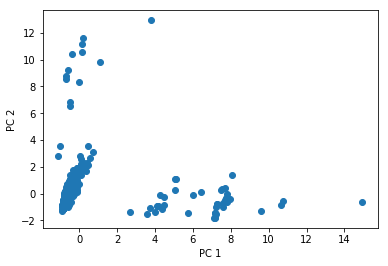

In [150]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])

plt.xlabel('PC 1')

plt.ylabel('PC 2')

plt.show()

### Poting the Explained Variance

In [151]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

X_test_pca = pca.transform(X_test_std)

In [152]:
lr = LogisticRegression()

lr = lr.fit(X_train_pca, y_train)

In [153]:

# Plot decision regions on train data



pp.plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')

plt.ylabel('PC 2')

plt.legend(loc='lower left')

plt.tight_layout()

plt.show()

NameError: name 'pp' is not defined

In [154]:
# Apply LDA



lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train_std, y_train)

In [155]:

# Apply logistic regression after LDA



lr = LogisticRegression()

lr = lr.fit(X_train_lda, y_train)



pp.plot_decision_regions(X_train_lda, y_train, classifier=lr)

plt.xlabel('LD 1')

plt.ylabel('LD 2')

plt.legend(loc='lower left')

plt.tight_layout()

plt.show()

NameError: name 'pp' is not defined

In [156]:
X_test_lda = lda.transform(X_test_std)



pp.plot_decision_regions(X_test_lda, y_test, classifier=lr)

plt.xlabel('LD 1')

plt.ylabel('LD 2')

plt.legend(loc='lower left')

plt.tight_layout()

plt.show()

NameError: name 'pp' is not defined

### 3.6. Over sampling

In [157]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_sample(X_train, y_train)

print([np.where(y_train == 0)[0].shape[0], np.where(y_train == 1)[0].shape[0]])

[436, 436]


In [158]:
#perform training with random forest with all columns

# specify random forest classifier

clf = RandomForestClassifier(n_estimators=100)



# perform training

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

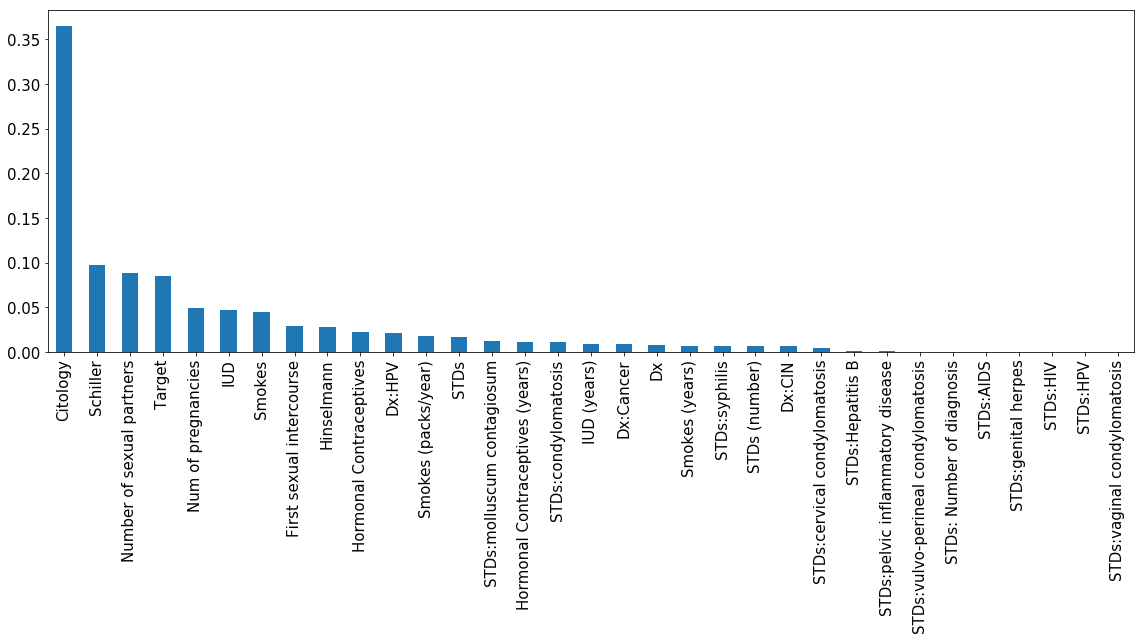

In [159]:
#%%-----------------------------------------------------------------------

#plot feature importances

# get feature importances

importances = clf.feature_importances_



# convert the importances into one-dimensional 1darray with corresponding df column names as axis labels

f_importances = pd.Series(importances, df.iloc[:, 1:].columns)



# sort the array in descending order of the importances

f_importances.sort_values(ascending=False, inplace=True)



# make the bar Plot from f_importances

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16, 9), rot=90, fontsize=15)



# show the plot

plt.tight_layout()

plt.show()

In [160]:
#%%-----------------------------------------------------------------------

#select features to perform training with random forest with k columns

# select the training dataset on k-features

newX_train = X_train[:, clf.feature_importances_.argsort()[::-1][:15]]



# select the testing dataset on k-features

newX_test = X_test[:, clf.feature_importances_.argsort()[::-1][:15]]

TypeError: '(slice(None, None, None), array([31, 30,  0, 32,  2,  8,  3,  1, 29,  6, 27,  5, 10, 19,  7],
      dtype=int64))' is an invalid key

In [161]:
#%%-----------------------------------------------------------------------

#perform training with random forest with k columns

# specify random forest classifier

clf_k_features = RandomForestClassifier(n_estimators=100)



# train the model

clf_k_features.fit(newX_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [162]:
#%%-----------------------------------------------------------------------

#make predictions



# predicton on test using all features

y_pred = clf.predict(X_test)

y_pred_score = clf.predict_proba(X_test)



# prediction on test using k features

y_pred_k_features = clf_k_features.predict(newX_test)

y_pred_k_features_score = clf_k_features.predict_proba(newX_test)

NameError: name 'newX_test' is not defined

In [163]:
# %%-----------------------------------------------------------------------

# calculate metrics gini model



print("\n")

print("Results Using All Features: \n")



print("Classification Report: ")

print(classification_report(y_test,y_pred))

print("\n")



print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)

print("\n")



print("ROC_AUC : ", roc_auc_score(y_test,y_pred_score[:,1]) * 100)



# calculate metrics entropy model

print("\n")

print("Results Using K features: \n")

print("Classification Report: ")

print(classification_report(y_test,y_pred_k_features))

print("\n")

print("Accuracy : ", accuracy_score(y_test, y_pred_k_features) * 100)

print("\n")

print("ROC_AUC : ", roc_auc_score(y_test,y_pred_k_features_score[:,1]) * 100)



Results Using All Features: 

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       187
           1       0.70      0.50      0.58        14

   micro avg       0.95      0.95      0.95       201
   macro avg       0.83      0.74      0.78       201
weighted avg       0.95      0.95      0.95       201



Accuracy :  95.02487562189054


ROC_AUC :  92.97173414820475


Results Using K features: 

Classification Report: 


NameError: name 'y_pred_k_features' is not defined

In [164]:
# %%-----------------------------------------------------------------------

# confusion matrix for gini model

conf_matrix = confusion_matrix(y_test, y_pred)

class_names = data['diagnosis'].unique()





df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )



plt.figure(figsize=(5,5))



hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)



hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)

hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)

plt.ylabel('True label',fontsize=20)

plt.xlabel('Predicted label',fontsize=20)

# Show heat map

plt.tight_layout()

NameError: name 'data' is not defined

In [165]:
# %%-----------------------------------------------------------------------



# confusion matrix for entropy model



conf_matrix = confusion_matrix(y_test, y_pred_k_features)

class_names = data['diagnosis'].unique()





df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )



plt.figure(figsize=(5,5))



hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)



hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)

hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)

plt.ylabel('True label',fontsize=20)

plt.xlabel('Predicted label',fontsize=20)

# Show heat map

plt.tight_layout()

plt.show()

NameError: name 'y_pred_k_features' is not defined

In [166]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)
    
print(importances)

SyntaxError: invalid syntax (<ipython-input-167-c421ca0873ef>, line 4)

In [168]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['0', 
                                        '1'],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

Image(graph.create_png()) 


NameError: name 'tree' is not defined

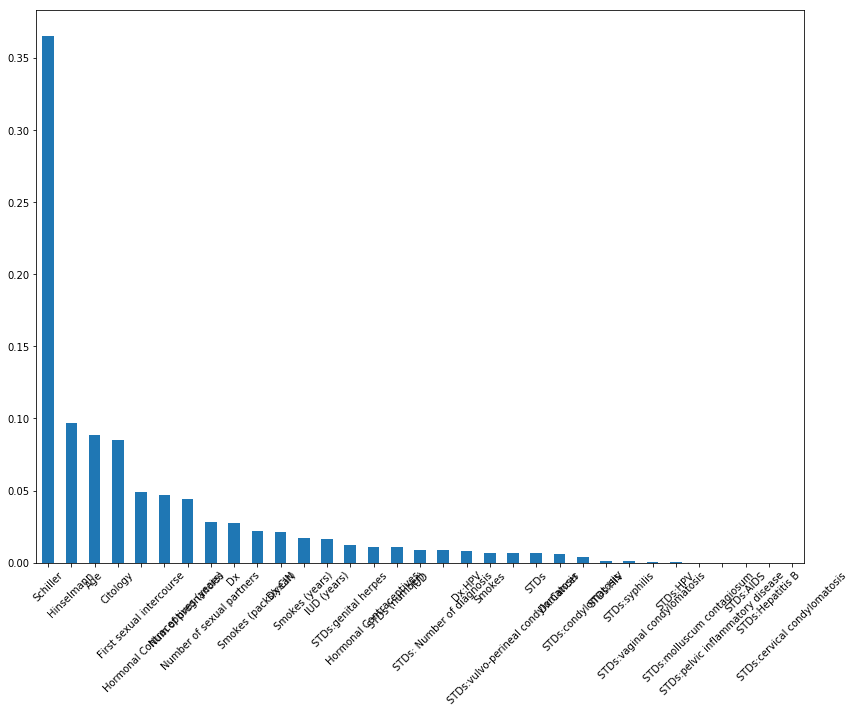

In [169]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(12,10), rot=45, fontsize=10)

# Show the plot
plt.tight_layout()
cervi = plt.savefig('feat_importance')
plt.show()


## 4. Hypterparameter tuning and model selection
In this section, we will first use the combination of pipeline and GridSearchCV to tune the hyperparameters of five classifiers:
- logistic regression
- multi-layer perceptron
- decision tree
- random forest
- support vector machine

Next we will select the best model across the five classifiers.

### 4.1. Create the dictionary of classifiers
In the dictionary:
- the key is the acronym of the classifier
- the value is the classifier (with random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clfs = {'lr': LogisticRegression(random_state=0),
        'mlp': MLPClassifier(random_state=0),
        'dt': DecisionTreeClassifier(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0, probability=True)}

# clfs = {'lr': LogisticRegression(random_state=0, class_weight='balanced'),
#         'mlp': MLPClassifier(random_state=0),
#         'dt': DecisionTreeClassifier(random_state=0, class_weight='balanced'),
#         'rf': RandomForestClassifier(random_state=0, class_weight='balanced'),
#         'svc': SVC(random_state=0, probability=True, class_weight='balanced')}

### 4.2. Create the dictionary of pipeline
In the dictionary:
- the key is the acronym of the classifier
- the value is the pipeline (with StandardScaler and the classifier)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

### 4.3. Create the dictionary of parameter grids
In the dictionary:
- the key is the acronym of the classifier
- the value is the parameter grid of the classifier

In [ ]:
param_grids = {}

### 4.3.1. The parameter grid for logistic regression
The hyperparameters we want to tune are:
- multi_class
- solver
- C

Here we need to use two dictionaries in the parameter grid since 'multinomial' (multi_class) does not support 'liblinear' (solver). See details of the meaning of the hyperparametes in [sklearn logistic regression documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['ovr'], 
               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'clf__C': C_range},
              {'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid

### 4.3.2. The parameter grid for multi-layer perceptron
The hyperparameters we want to tune are:
- hidden_layer_sizes
- activation

See details of the meaning of the hyperparametes in [sklearn multi-layer perceptron documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [ ]:
param_grid = [{'clf__hidden_layer_sizes': [10, 100, 200],
               'clf__activation': ['identity', 'logistic', 'tanh', 'relu']}]

param_grids['mlp'] = param_grid

### 4.3.3. The parameter grid for decision tree
The hyperparameters we want to tune are:
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn decision tree documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [ ]:
param_grid = [{'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['dt'] = param_grid

### 4.3.4. The parameter grid for random forest
The hyperparameters we want to tune are:
- n_estimators
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn random forest documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

### 4.3.5. The parameter grid for support vector machine
The hyperparameters we want to tune are:
- C
- gamma
- kernel

See details of the meaning of the hyperparametes in [sklearn support vector machine documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

param_grids['svc'] = param_grid

## 4.4. Hyperparameter tuning
Here we use two functions for hyperparameter tuning:
- [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html): Exhaustive search over specified parameter values for an estimator
- [StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html): Stratified K-Folds cross-validator

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='precision',
                      n_jobs=1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

## 4.5. Model selection

In [ ]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)

# For each [best_score_, best_params_, best_estimator_]
for best_score_param_estimator in best_score_param_estimators:
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    # Since we only print out the type of classifier of the pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

## 5. Print the accuracy of the best model on the testing data

In [ ]:
print(best_score_param_estimators[0][2].score(X_test, y_test))

### 7.1. Print the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = best_score_param_estimators[0][2].predict(X_test)
confusion_matrix(y_test, y_pred, labels=[0, 1])

In [ ]:
#Print Metrics Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

<h1 align="center"> 
ROC CURVE
</h1>

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()